In [24]:
import pandas as pd
import seaborn as sns
sns.set()

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, SGDClassifier, PassiveAggressiveClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

from lightgbm import LGBMClassifier

# This config is set as False to print the model's default parameters when we print the model.
# Without this, only the parameters which are explicitly specified will be printed, not all
from sklearn import set_config
set_config(print_changed_only=False)

In [25]:
# Details of the column can be found at 'https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset?select=heart.csv'
df = pd.read_csv('dataset/heart.csv')

In [26]:
df.head(3)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [27]:


'''
From the documentation, we can find:
    - age : Age of the patient
    - sex : Sex of the patient
    - cp : Chest Pain type chest pain type
        - Value 1: typical angina
        - Value 2: atypical angina
        - Value 3: non-anginal pain
        - Value 4: asymptomatic
    - trtbps : resting blood pressure (in mm Hg)
    - chol : cholestoral in mg/dl fetched via BMI sensor
    - fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    - rest_ecg : resting electrocardiographic results
        - Value 0: normal
        - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
    - thalach : maximum heart rate achieved
    - exang: exercise induced angina (1 = yes; 0 = no)
    - oldpeak : Last peak achieved
    - slp : Slope
    - caa : number of major vessels (0-3)
    - thall : thal rate
    - output : 0= less chance of heart attack 1= more chance of heart attack
    
'''


# Lets change the column names to define some mearningful names.
columns = ['age','sex','chest_pain_type','resting_blood_pressure','cholesterol','fasting_blood_sugar','rest_ecg_result','max_heart_rate','exercise_induced_angina','prev_peak','slope','num_major_vessels','thal_rate','heart_attack_chance']

In [28]:
df.columns = columns

In [29]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg_result,max_heart_rate,exercise_induced_angina,prev_peak,slope,num_major_vessels,thal_rate,heart_attack_chance
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age                        303 non-null int64
sex                        303 non-null int64
chest_pain_type            303 non-null int64
resting_blood_pressure     303 non-null int64
cholesterol                303 non-null int64
fasting_blood_sugar        303 non-null int64
rest_ecg_result            303 non-null int64
max_heart_rate             303 non-null int64
exercise_induced_angina    303 non-null int64
prev_peak                  303 non-null float64
slope                      303 non-null int64
num_major_vessels          303 non-null int64
thal_rate                  303 non-null int64
heart_attack_chance        303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### We can see that there is no missing data

## See the data set as a Report

In [8]:
import pandas_profiling as pp

In [24]:
profile_report = pp.ProfileReport(df,title='Heart Attack Data',html={'style':{'full_width':True}})


In [25]:
# Save this report as file
profile_report.to_file(output_file='heart-attack-data.html')

Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/himanshubhusan.rath/.local/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3417, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-25-1b6350b05e0f>", line 2, in <module>
    profile_report.to_file(output_file='heart-attack-data.html')
  File "/opt/anaconda3/envs/machine-learning-env/lib/python3.7/site-packages/pandas_profiling/profile_report.py", line 261, in to_file
    data = self.to_html()
  File "/opt/anaconda3/envs/machine-learning-env/lib/python3.7/site-packages/pandas_profiling/profile_report.py", line 372, in to_html
    return self.html
  File "/opt/anaconda3/envs/machine-learning-env/lib/python3.7/site-packages/pandas_profiling/profile_report.py", line 189, in html
    self._html = self._render_html()
  File "/opt/anaconda3/envs/machine-learning-env/lib/python3.7/site-packages/pandas_profiling/profile_report.py", line 291, in _render_html
    report = self.report
  Fil

TypeError: object of type 'NoneType' has no len()

Error in callback <function flush_figures at 0x13c9e83b0> (for post_execute):


KeyboardInterrupt: 

## Pre-processing

In [37]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
'''
This method does the below pre-processing to the data
1. One-hot encoding
2. label encoding
3. SMOTE
'''
def pre_process(input_features, output_label):

    print('\n\n----------------------------------- \n ----------- DATA PRE-PROCESSING -------- \n -----------------------------------')
    
    print('STEP-1 : Check if any of the features are categorical.')
    cat_features = [col_name for col_name in input_features.columns if input_features[col_name].dtype == 'object']
    
    if len(cat_features) > 0:
        print('Converting categorical features to One-Hot encoding - START')
        col_trans = ColumnTransformer(transformers=('encoder',OneHotEncoder(),cat_features),remainder='passthrough')
        input_features = col_trans.fit_transform(input_features)
        print('Converting categorical features to One-Hot encoding - FINISH')
    else:
        print('No categorical features found. Skipping the conversion step.')
    
    
    print('\n\nSTEP-2 : Check if the output label is an object type (yes/no kind)')
    if output_label.dtype == 'object':
        print('Converting output label to numeric values - START')
        label_encoder = LabelEncoder()        
        output_label = label_encoder.fit_transform(output_label)
        print('Converting output label to numeric values - FINISH')
    else:
        print('No label encoding required as the output label is not an object type')
        
    
    print('\n\nSTEP-3: Perform SMOTE sampling to solve imbalance class problem (if exists)')
    print('Applying SMOTE - START')
    smote = SMOTE(k_neighbors=4)
    input_features, output_label = smote.fit_resample(input_features, output_label)
    print('Applying SMOTE - FINISH')
    
    return input_features, output_label

## Model building, training & evaluation
Note: We will evaluate different kind of models

In [52]:
def model_analysis(X,Y,test_size,random_state,cv_fold_count=5,optimize=False):
    print('\n\n----------------------------------- \n ----------- MODEL ANALYSIS-------- \n -----------------------------------')
    print('STEP-1 : Prepare the training and test data')
    print('Prepate training & test data - START')
    X_train, X_test, Y_train,Y_test = train_test_split(X,Y,test_size=test_size,random_state=random_state)
    print('Prepate training & test data - FINISH')
    
    
    print('\n\nSTEP-2 : Standard scaling to standardize the input to have 0 mean and 1 standard deviation')
    print('Standard scaling - START')
    std_scaler = StandardScaler()
    X_train = std_scaler.fit_transform(X_train)
    X_test = std_scaler.transform(X_test)
    print('Standard scaling - FINISH')
    
    print('\n\nSTEP-3 : Train some basic classifiers')
    
    print('\n -------- Models we considered for training ----------')
    print('1. LR (Logistic Regression)')
    print('2. SVC (Support Vector Machine Classifier)')
    print('3. KNN (K-nearest Neighbour)')
    print('4. GNB (Gaussian Naive Bayes)')
    print('5. DTC (Decision Tree Classifier)')
    print('6. SGDC (SGD Classifier)')
    print('7. ADC (AdaBoost Classifier)')
    print('8. RF (Random Forest Classifier)')
    print('9. LGBN (LGBM Classifier)')
    print('10. PAC (Passive Aggressive Classifier)')
    print('11. XGB (Gradient Boosting Classifier)')
    print('\n\n -----------------------------------------------------')
    
    print('\n Define the parameters for these models')
    
    param_lr = [
        {
            'penalty' : ['l2'],
            'solver' : ['newton-cg'],
            'C': np.logspace(-4,4,5)
        },
        {
            'penalty' : ['l1','l2'],
            'solver' : ['liblinear'],
            'C': np.logspace(-4,4,5)
        }
    ]
    
    param_svc = [
        {
            'kernel' : ['rbf'],
            'gamma' : [0.1,0.5,0.9,1.0],
            'C' : np.logspace(-4,4,5)
        }
    ]
    
    param_knn = [
        {
            'n_neighbors' : list(range(1,10)),
            'weights' : ['uniform','distance'],
            'algorithm' : ['auto','kd_tree','brute']
        }
    ]

    param_gnb = [{}]
    
    param_dtc = [
        {
            'criterion' : ['gini','entropy'],
            'splitter' : ['best','random'],
            'max_depth' : [4,8,12,16,20,30,40,60,80,100]
        }
    ]
    
    param_sgdc = [
        {
            'penalty' : ['l1','l2','elasticnet'],
            'loss' : ['hinge','log'],
            'alpha' : np.logspace(-4,4,20)
        }
    ]
    
    param_adc = [
        {
            'learning_rate' : [0.005,0.01],
            'n_estimators' : [8,16,24]
        }
    ]
    
    ''' 
    param_rfc = [
        {
           'criterion' : ['gini','entropy'],
           'max_depth' : [int(x) for x in np.linspace(start=5, stop=20, num=5)],
           'n_estimators' : [int(x) for x in np.linspace(start=100, stop=800,num=8)],
           'max_features' : ['auto','sqrt'],
           'max_depth' : [int(x) for x in np.linspace(start=5, stop=20, num=5)],
           'min_samples_split' : [2,5,10,15,100],
           'min_samples_leaf' : [1,2,5]
        }
    ]
   
    Note: The above 'param_rfc' param is taking so much time to execute in local.
    So, using the minimal param as mentioned below.
   
    '''
    
    param_rfc = [
        {
            'criterion': ['gini', 'entropy'],
            'n_estimators': [100, 300, 500, 750, 1000],
            'max_features': [2, 3],
        }
    ]
    
    param_lgbm = [
        {
            'learning_rate' : [0.005,0.1],
            'n_estimators' : [8,16,24],
            'boosting_type' : ['gbdt','dart'],
            'objective' : ['binary']
            
        }
    ]
    
    param_pac = [
        {
            'C' : np.logspace(-4,4,20)
        }
    ]
    
    param_xgb = [
        {
            'max_depth' : [int(x) for x in np.linspace(start=5, stop=50, num=5)],
            'learning_rate' : [0.3, 0.1]
        }
    ]
    
    print('\n Define the models using the parameters')
    # Define models
    MODELS = [
        ('LR',LogisticRegression(),param_lr),
        ('SVC', SVC(),param_svc),
        ('KNN', KNeighborsClassifier(), param_knn),
        ('GNB',GaussianNB(),param_gnb),
        ('DTC', DecisionTreeClassifier(),param_dtc),
        ('SGDC',SGDClassifier(),param_sgdc),
        ('ADC',AdaBoostClassifier(), param_adc),
        ('RF',RandomForestClassifier(),param_rfc),
        ('LGBM', LGBMClassifier(),param_lgbm),
        ('PAC',PassiveAggressiveClassifier(),param_pac),
        ('XGB',GradientBoostingClassifier(),param_xgb)
    ]
    
    model_results = []
    
    for model_name, model, params in MODELS:
        print('*************************************************************************************')
        print(f'\n\n*************************   MODEL : {model_name}  ******************************')
        print('*************************************************************************************')
        # Train the model
        model.fit(X_train, Y_train)
        # Predict
        predictions = model.predict(X_test)
        # Find accuracy
        test_accuracy = accuracy_score(Y_test, predictions) * 100
        print(f'Test Accuracy : {test_accuracy}')
        # Apply K-Fold Cross validation
        val_accuracies = cross_val_score(estimator=model,X=X_train,y=Y_train,cv=cv_fold_count, scoring='accuracy')
        val_accuracy = val_accuracies.mean() * 100
        val_std = val_accuracies.std() * 100
        print(f'Accuracy after applying K-Fold Cross Validation : {val_accuracy}%')
        print(f'Standard deviation after applying K-Fold Cross Validation : {val_std}%')
        
        # Initialize the accuracy before model tuning (if enabled)
        optimized_accuracy = '#NA'
        
        if optimize == True and not model_name == 'GNB':
            print('\n ---- MODEL OPTIMIZATION USING GRID SEARCH ----')
            optimized_model = GridSearchCV(
                estimator=model, 
                param_grid=params, 
                scoring='accuracy', 
                cv=cv_fold_count,
                n_jobs=1,
                verbose=1
            )
            optimized_model.fit(X_train,Y_train)
            optimized_accuracy = optimized_model.best_score_ * 100
            best_params = optimized_model.best_params_
            print(f'Best accuracy after optimization : {optimized_accuracy}%')
            print(f'Best parameters after optimization : {best_params}%')
        
        # Add the best accuracy for the model to the result list
        model_results.append((model_name,val_accuracy,optimized_accuracy,test_accuracy))
    
    print('\n==================== MODEL COMPARISON =====================\n')
    model_results = sorted(model_results, key = lambda x : x[1] , reverse=True)
    model_results = pd.DataFrame(model_results,columns=['model','val_accuracy','tuned_model_accuracy','test_accuracy'])
    print(model_results)
    
    sns.barplot(x=model_results.model, y=model_results.val_accuracy)
    
    
    
    
    
    
    
    



----------------------------------- 
 ----------- DATA PRE-PROCESSING -------- 
 -----------------------------------
STEP-1 : Check if any of the features are categorical.
No categorical features found. Skipping the conversion step.


STEP-2 : Check if the output label is an object type (yes/no kind)
No label encoding required as the output label is not an object type


STEP-3: Perform SMOTE sampling to solve imbalance class problem (if exists)
Applying SMOTE - START
Applying SMOTE - FINISH


----------------------------------- 
 ----------- MODEL ANALYSIS-------- 
 -----------------------------------
STEP-1 : Prepare the training and test data
Prepate training & test data - START
Prepate training & test data - FINISH


STEP-2 : Standard scaling to standardize the input to have 0 mean and 1 standard deviation
Standard scaling - START
Standard scaling - FINISH


STEP-3 : Train some basic classifiers

 -------- Models we considered for training ----------
1. LR (Logistic Regression)
2.

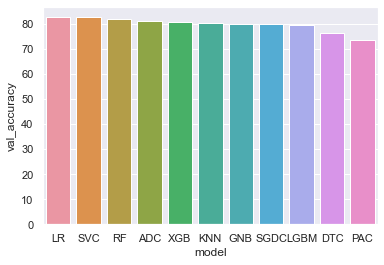

In [56]:
X = df.copy().drop(['heart_attack_chance'],axis=1)
Y = df.heart_attack_chance
# Pre-processing
X,Y = pre_process(X,Y)
model_analysis(X,Y,0.2,23,optimize=False)